In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
atus2021 = pd.read_csv("./conjunto_de_datos/atus_anual_2021.csv", index_col=False)
atus2022 = pd.read_csv("./conjunto_de_datos/atus_anual_2022.csv", index_col=False)
atus2023 = pd.read_csv("./conjunto_de_datos/atus_anual_2023.csv", index_col=False)

tc_entidad = pd.read_csv("./catalogos/tc_entidad.csv", index_col=False)
tc_municipio = pd.read_csv("./catalogos/tc_municipio.csv", index_col=False)


# 1. Cargue en un Dataframe los datos de los accidentes de los últimos 3 años


In [2]:
dataset = pd.concat([atus2021, atus2022, atus2023], ignore_index=True)

# 2. Agregue una columna tipo date formada por los valores de las columnas correspondientes a Año, Mes, Dia, Hora y Minuto.

In [3]:
dataset.insert(3, 'DATE', dataset['ANIO'].astype(str) + '-' + dataset['MES'].astype(str).str.zfill(2) + '-' + dataset['ID_DIA'].astype(str).str.zfill(2) + ' ' + dataset['ID_HORA'].astype(str).str.zfill(2) + ':' + dataset['ID_MINUTO'].astype(str).str.zfill(2))

In [4]:
#dataset

# 3. Agregue una columna para Área cuyos valores serán Urbana o Suburbana dependiendo del área donde ocurrió el accidente.

In [5]:
def asignar_area(row):
    if row['URBANA'] == 'Sin accidente en esta zona':
        return 'SUBURBANA'
    elif row["URBANA"] == "Accidente en intersección":
        return "URBANA"
    elif row["URBANA"] == "Accidente en no intersección":
        return "URBANA"
    elif row["SUBURBANA"] == "Accidente en carretera estatal":
        return "SUBURBANA"

dataset['AREA'] = dataset.apply(asignar_area, axis=1)

In [6]:
#dataset

# 4. Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente.

In [7]:
def asignar_zona(row):
    if row['AREA'] == 'SUBURBANA':
        return row['SUBURBANA']
    elif row['AREA'] == 'URBANA':
        return row['URBANA']
    
    
dataset["ZONA"] = dataset.apply(asignar_zona, axis=1)

In [8]:
# dataset

# 5. Elimine las columnas URBANA y SUBURBANA.

In [9]:
dataset = dataset.drop(columns=["URBANA"])
dataset = dataset.drop(columns=["SUBURBANA"])


In [10]:
dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,AREA,ZONA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en intersección
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en intersección
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,URBANA,Accidente en intersección
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en intersección
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en intersección
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en no intersección
1145649,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en no intersección
1145650,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en no intersección
1145651,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en no intersección


# 6. Determine cual municipio de cada estado tuvo más meses sin accidentes.

# 7. Resuma los accidentes del último año por tipo y que porcentaje representan.

In [13]:
accidentes_2023 = dataset[dataset["ANIO"] == 2023]
resumen_accidentes = accidentes_2023.groupby('TIPACCID').size().reset_index(name='CANTIDAD')
total_accidentes = resumen_accidentes['CANTIDAD'].sum()
resumen_accidentes['PORCENTAJE'] = (resumen_accidentes['CANTIDAD'] / total_accidentes) * 100
resumen_accidentes


,TIPACCID,CANTIDAD,PORCENTAJE
0,Caída de pasajero,1947,0.490888
1,Certificado cero,15580,3.928114
2,Colisión con animal,1026,0.258681
3,Colisión con ciclista,3928,0.990349
4,Colisión con ferrocarril,264,0.066561
5,Colisión con motocicleta,57421,14.477294
6,Colisión con objeto fijo,44233,11.152264
7,Colisión con peatón (atropellamiento),11853,2.988443
8,Colisión con vehículo automotor,232509,58.621429
9,Incendio,381,0.096060


# 8. Obtenga la cantidad de muertos y lesionados de los últimos 3 años.

In [14]:
dataset_2021 = dataset[dataset["ANIO"] == 2021]
numMuertos_2021 = dataset_2021[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']].sum().sum()

dataset_2022 = dataset[dataset["ANIO"] == 2022]
numMuertos_2022 = dataset_2022[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']].sum().sum()

dataset_2023 = dataset[dataset["ANIO"] == 2023]
numMuertos_2023 = dataset_2023[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']].sum().sum()

print("Cantidad de muertos en 2021: "+str(numMuertos_2021) + "\n" + "Cantidad de muertos en 2022: "+str(numMuertos_2022) + "\n" + "Cantidad de muertos en 2023: "+str(numMuertos_2023) + "\n" + "Total de muertos en los ultimos 3 años: "+str(numMuertos_2021+numMuertos_2022+numMuertos_2023))

Cantidad de muertos en 2021: 4401
Cantidad de muertos en 2022: 5181
Cantidad de muertos en 2023: 4803
Total de muertos en los ultimos 3 años: 14385


In [15]:
datasetLesionados_2021 = dataset[dataset["ANIO"] == 2021]
numLesionados2021 = datasetLesionados_2021[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']].sum().sum()

datasetLesionados_2022 = dataset[dataset["ANIO"] == 2022]
numLesionados2022 = datasetLesionados_2022[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']].sum().sum()

datasetLesionados_2023 = dataset[dataset["ANIO"] == 2023]
numLesionados2023 = datasetLesionados_2023[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']].sum().sum()

print("Cantidad de lesionados en 2021: "+str(numLesionados2021) + "\n" + "Cantidad de lesionados en 2022: "+str(numLesionados2022) + "\n" + "Cantidad de lesionados en 2023: "+str(numLesionados2023) + "\n" + "Total de lesionados en los ultimos 3 años: "+str(numLesionados2021+numLesionados2022+numLesionados2023))

Cantidad de lesionados en 2021: 82466
Cantidad de lesionados en 2022: 91501
Cantidad de lesionados en 2023: 90500
Total de lesionados en los ultimos 3 años: 264467


# 9. ¿Cómo se compara el número de accidentes de cada año contra el anterior? ¿En qué porcentaje varió?.

In [16]:
variacion_2022 = ((numMuertos_2022 - numMuertos_2021) / numMuertos_2021) * 100
variacion_2023 = ((numMuertos_2023 - numMuertos_2022) / numMuertos_2022) * 100
print("Cantidad de muertos en 2021: " + str(numMuertos_2021))
print("Cantidad de muertos en 2022: " + str(numMuertos_2022) + " (Variación: {:.2f}%)".format(variacion_2022))
print("Cantidad de muertos en 2023: " + str(numMuertos_2023) + " (Variación: {:.2f}%)".format(variacion_2023))

Cantidad de muertos en 2021: 4401
Cantidad de muertos en 2022: 5181 (Variación: 17.72%)
Cantidad de muertos en 2023: 4803 (Variación: -7.30%)


# 10. Seleccione una o dos características y haga una gráfica de cada una de las siguientes:
    1. Histograma
    2. Dispersión
    3. Líneas


1. Histograma (Muertos por año)

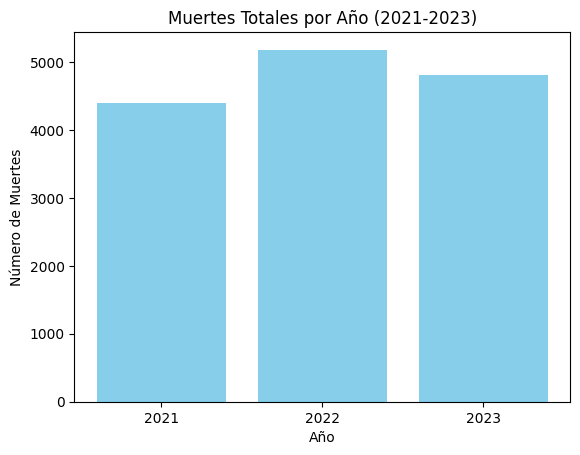

In [17]:
anios = [2021, 2022, 2023]
muertes = [numMuertos_2021, numMuertos_2022, numMuertos_2023]
plt.bar(anios, muertes, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Número de Muertes')
plt.title('Muertes Totales por Año (2021-2023)')
plt.xticks(anios)
plt.show()

2. Dispersión (Muertes por año)

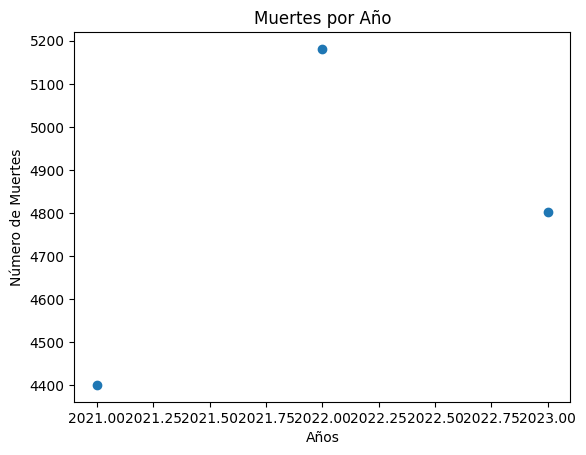

In [18]:
plt.scatter(anios, muertes)

plt.xlabel('Años')
plt.ylabel('Número de Muertes')
plt.title('Muertes por Año')

plt.show()

3. Lineas (Muertes por año)

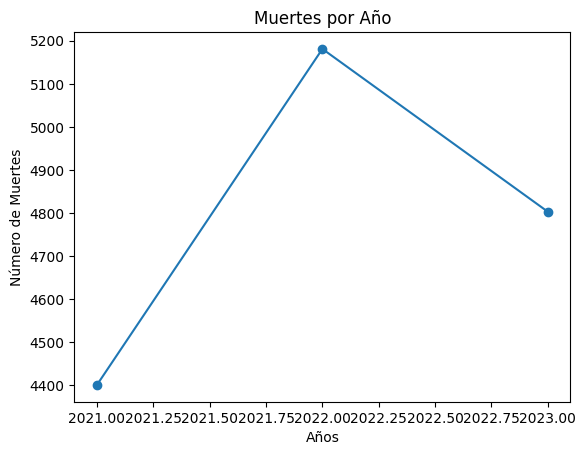

In [19]:
plt.plot(anios, muertes, marker='o')

plt.xlabel('Años')
plt.ylabel('Número de Muertes')
plt.title('Muertes por Año')

plt.show()